In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [0]:
path = "/content/CheXpert-v1.0-small"

In [0]:
#function to replace urls
def edit_urls(url):
    pieces = url.split('/')
    newurl=''
    for i, piece in enumerate(pieces):
        if i>0:
            newurl += '/' + piece
        elif i==0:
            newurl += path
    return newurl

# read csv files
train_df = pd.read_csv(path + "/train.csv")
train_df = train_df.sample(1000)
test_df = pd.read_csv(path + "/valid.csv")

# fill missing values and replace -1 with 1
train_df = train_df.fillna(0)
train_df = train_df.replace(-1, 1)

# appry URL function to change urls to be able to read images
train_df["Path"] = train_df["Path"].apply(edit_urls)
test_df["Path"] = test_df["Path"].apply(edit_urls)

#make integers
test_df = test_df[outcomes].astype(int)

In [0]:
df = test_df

In [32]:
df.shape

(234, 19)

In [50]:
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/content/CheXpert-v1.0-small/valid/patient6454...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/content/CheXpert-v1.0-small/valid/patient6454...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/content/CheXpert-v1.0-small/valid/patient6454...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/content/CheXpert-v1.0-small/valid/patient6454...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/content/CheXpert-v1.0-small/valid/patient6454...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

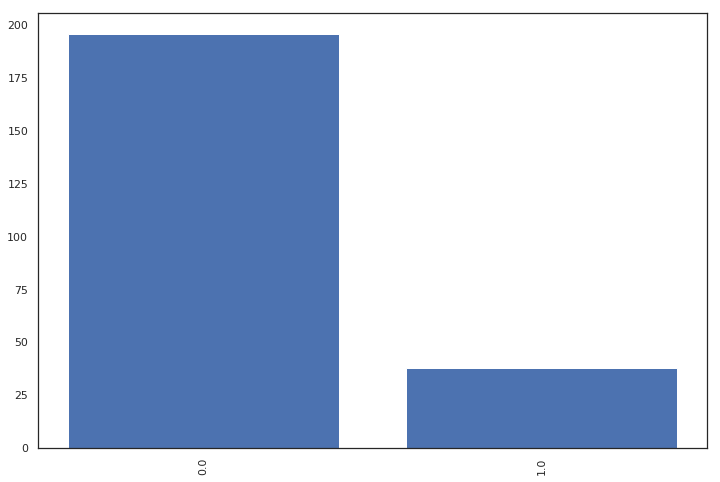

In [35]:
label_counts = df['No Finding'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

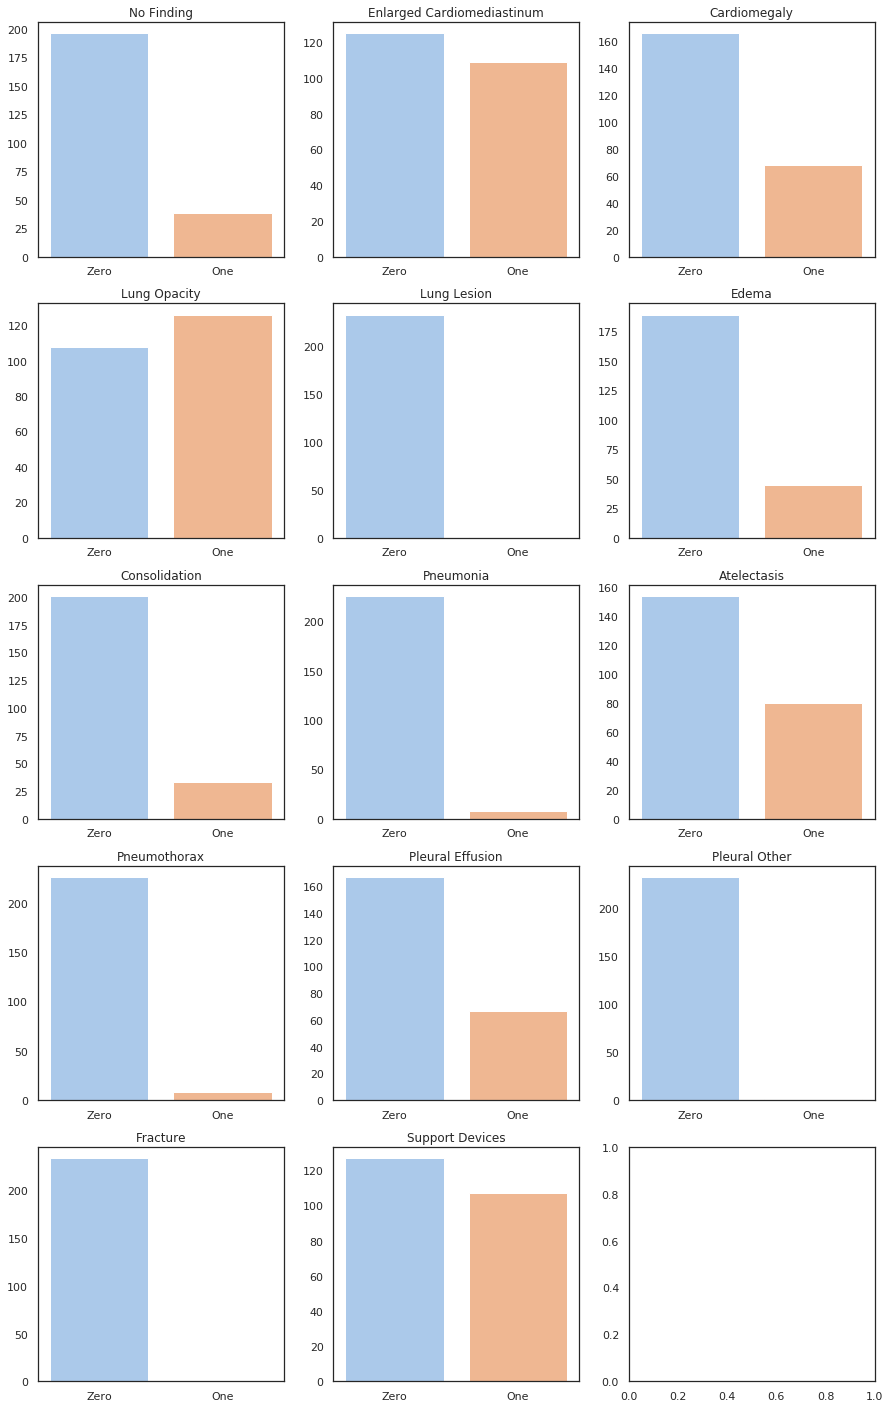

In [52]:

outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']
numrows = 5
numcols = 3

f, ax = plt.subplots(nrows=numrows, ncols=numcols, figsize=(numcols*5,numrows*5))


for subplot, pathology in enumerate(outcomes):
  nulls = df[pathology].isna().count()
  zeros = df[df[pathology] == 0]['Age'].count()
  ones = df[df[pathology]==1]['Age'].count()

  plt.subplot(numrows, numcols, subplot+1)
  
  sns.barplot(
      x = ['Zero', 'One'],
      y = [zeros, ones],
      palette=sns.color_palette('pastel')
  )
  plt.title(pathology)

plt.show()

In [55]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

TypeError: ignored

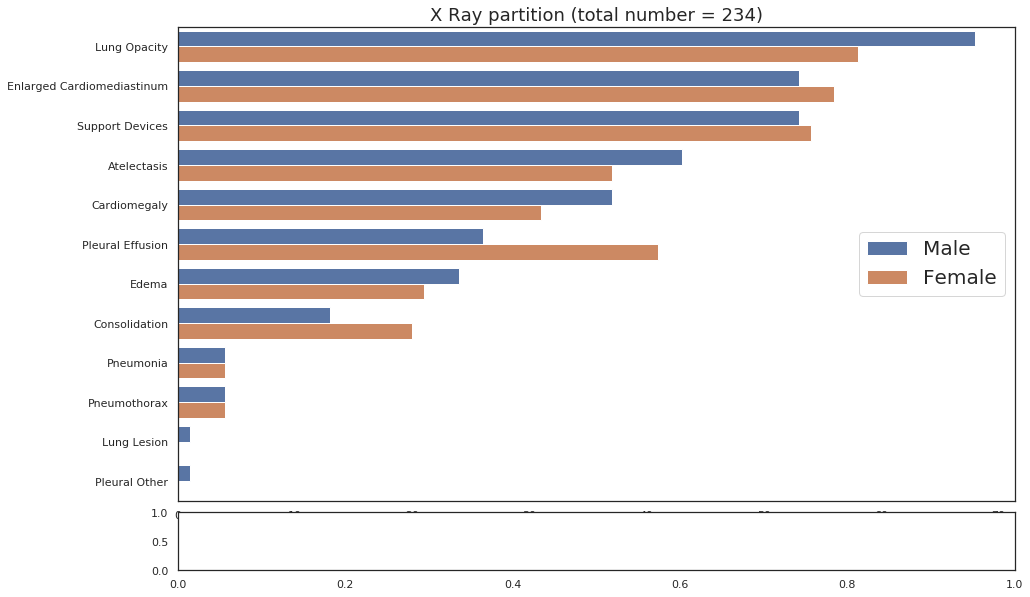

In [78]:
pathology_list = ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
                id_vars=['Sex'],
                value_vars = list(pathology_list),
                var_name = 'Category',
                value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Sex',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 234)',fontsize=18);

#df['Nothing']=df['No Finding'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Sex'],
             value_vars = list([pathology_list]),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Sex',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)